<a href="https://colab.research.google.com/github/pyayivargitam/Infosys-Assignments/blob/main/Copy_of_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## XGBoost
`XGBoost` (Extreme Gradient Boosting) is a powerful and efficient open-source machine learning library based on the gradient boosting framework. It is widely used for both regression and classification problems.

- Key Features:

  - Highly efficient and scalable implementation optimized for speed and performance.

  - Supports regularization (L1 and L2) to reduce overfitting.

  - Handles missing data internally.

  - Supports parallel and distributed computing.

  - Provides flexibility with various objective functions and evaluation metrics.

- Advantages:

  - Superior predictive accuracy for many machine learning tasks.

  - Effective handling of large datasets with high dimensionality.

  - Robustness against overfitting through shrinkage, tree pruning, and regularization.

Strong community support and integration with popular data science frameworks.

`XGBoost` is a go-to algorithm for many data science competitions and real-world applications due to its balance of accuracy, speed, and ease of use in predictive modeling.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/preprocessed_earthquake_data.csv')

In [ ]:
target = 'Magnitude'
categorical_cols = ['Type', 'Magnitude Type', 'Source', 'Status']
numeric_cols = df.drop(columns=[target]+categorical_cols).columns.tolist()

In [ ]:
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
## Implementing pipeplie
numeric_transformer = StandardScaler()

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers = [
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(random_state=42, use_label_encoder=False, eval_metric='rmse'))
])

In [ ]:
# Train the pipeline
model_pipeline.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:25:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Latitude', 'Longitude',
                                                   'Depth', 'Root Mean Square',
                                                   'Year', 'Day', 'Month_sin',
                                                   'Month_cos', 'Hour_sin',
                                                   'Hour_cos', 'Type_Explosion',
                                                   'Type_Nuclear Explosion',
                                                   'Type_Rock Burst',
                                                   'Magnitude Type_MD',
                                                   'Magnitude Type_MH',
                                                   'Magnitude Type_ML',
                                                   'Magnitude Type_MS',
                                                   'Magnitude Type_MW',
                                                   '...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [ ]:
# Predict on validation data
y_pred = model_pipeline.predict(X_test)

In [ ]:
# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f'XGBoost Regression MAE: {mae:.4f}')
print(f'XGBoost Regression MSE: {mse:.4f}')
print(f'XGBoost Regression R² Score: {r2:.4f}')

XGBoost Regression MAE: 0.6844
XGBoost Regression MSE: 0.9010
XGBoost Regression R² Score: 0.1327


In [ ]:
# Access the trained XGBoost model from the pipeline to get feature importances
# For feature names after transformation, get numeric + encoded categorical names

encoded_cat_features = model_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_features = numeric_cols + list(encoded_cat_features)

feature_importances = model_pipeline.named_steps['regressor'].feature_importances_
indices = np.argsort(feature_importances)[::-1]


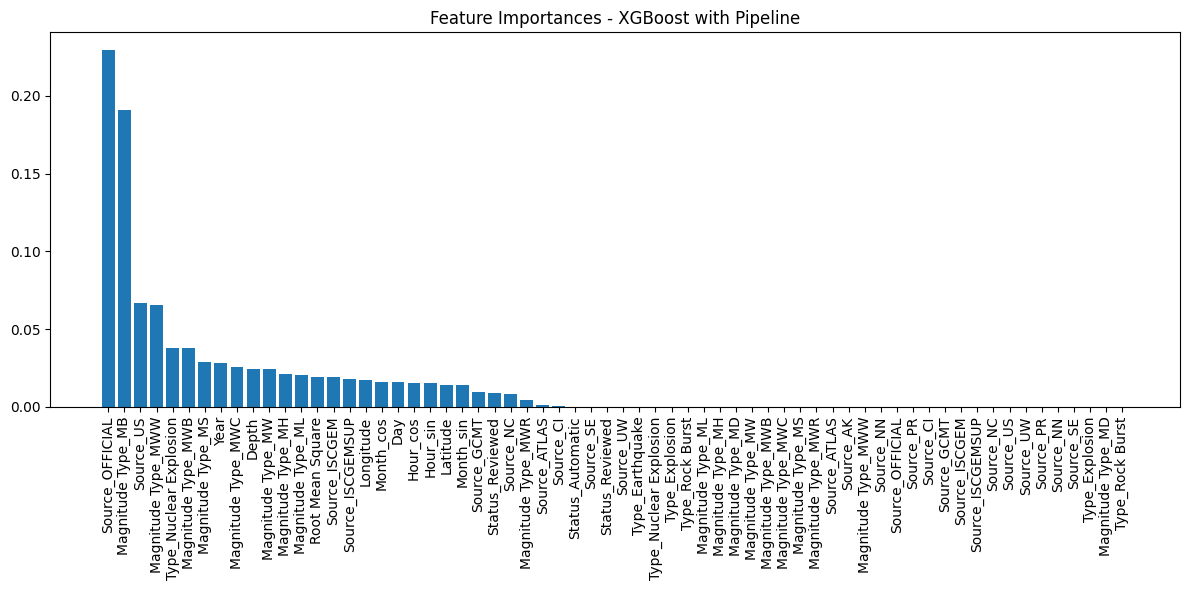

In [ ]:
# Plot feature importances
plt.figure(figsize=(12, 6))
plt.title('Feature Importances - XGBoost with Pipeline')
plt.bar(range(len(all_features)), feature_importances[indices], align='center')
plt.xticks(range(len(all_features)), np.array(all_features)[indices], rotation=90)
plt.tight_layout()
plt.show()
